# M05. Yield Analysis

A manufacturing _defect_ is any flaw arisen from an error in production that causes a product failure. As it is anomalous by nature, a defect is less considered _per se_ than as part of a statistical cohort across an entire production process. Within semiconductor device fabrication, for instance, it is natural to consider the _density_ of defects over a given substrate. Supposing that a die will fail if it contains even a single defect, the yield of a wafer ought to be a decreasing function of die area. 

Let's make the innocuous assumption that defects are randomly distributed over a wafer&mdash;said wafer containing however many dies. For mathematical tractability, let the number of defects per die ($k$) be a Poisson-distributed variable with mean $\lambda$. Then, the probability that any one die works (the yield) is given by

$$Y = P(k = 0) = \frac{\lambda^k e^{-\lambda}}{k!}\bigg\rvert_{k = 0} = e^{-\lambda}.$$

We can recast this in terms of defect density and die area with $\lambda = D_0 A$ where $D_0$ is the average number of defects per unit area and $A$ is the area of each die, from which we obtain the _Poisson Die Yield Model_

$$Y = e^{-D_0 A}.$$

While this model suffices as a first-order approximation, it tends to overestimate failures (and hence underestimate yields) for larger die areas. It was later found that defect density tends to be sporadic&mdash;even on the same wafer. In other words, defects seem to _cluster_. One way to account for this is by relaxing the expected number of defects per die, $\lambda$, and treating it as itself a random variable with a probability-density function $P(\lambda)$. This suggests a _Compound Poisson Distribution_. For our purposes, this may be interpreted as a sort of convolution of the Poisson Die Yield Model with a varying mean $P(\lambda)$

$$Y = P(k=0) = \int_{0}^{\infty} \frac{\lambda^k e^{-\lambda}}{k!}P(\lambda) d\lambda\bigg\rvert_{k=0} = \int_{0}^{\infty}e^{-\lambda } P(\lambda)d\lambda.$$

More on compound distributions may be found [here](https://en.wikipedia.org/wiki/Compound_probability_distribution).

There remains the question of what $P(\lambda)$ actually _is_. An empirically-robust and commonly-used distribution is the two-parameter Gamma density function $\lambda\sim Gamma(\alpha>0,\beta>0)$ which has PDF

$$P(\lambda) = \frac{\beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}.$$

The Gamma distribution has mean $\alpha/\beta$ which we will assert as the average number of defects per die: $\lambda_0 = D_0A=\alpha/\beta$. Here, $\lambda_0$ is effectively the 'mean of the mean' of the Compound Poisson Distribution. Finally, note also that the Gamma _function_ is defined thus

$$\Gamma(z) = \int_{0}^{\infty} e^{-x}x^{z-1}dx.$$

The Gamma function is often first encountered in complex analysis. Or, you may have seen it spat out by Wolfram Alpha in response to a particularly nasty integral.

We proceed as follows:

\begin{align*}
Y = P(k=0) &= \int_{0}^{\infty}e^{-\lambda}P(\lambda)d\lambda\\
&=  \int_{0}^{\infty}\frac{e^{-\lambda}\beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}d\lambda\\
&= \frac{\beta^\alpha }{\Gamma(\alpha)}\int_{0}^{\infty}e^{-\beta\lambda}e^{-\lambda}\lambda^{\alpha-1}d\lambda\\
&= \frac{\beta^\alpha }{\Gamma(\alpha)}\int_{0}^{\infty}e^{-\lambda(1+\beta)}\lambda^{\alpha-1}d\lambda,
\end{align*}

the last integral being resolved with the substitution $\eta = \lambda(1+\beta)$, by which

\begin{align*}
Y &=\frac{\beta^\alpha }{\Gamma(\alpha)}\int_{0}^{\infty}e^{-\eta}\left(\frac{\eta}{1+\beta}\right)^{\alpha-1}\frac{1}{1+\beta}d\eta \\
&= \frac{\beta^\alpha }{\Gamma(\alpha)(1+\beta)}\int_{0}^{\infty}e^{-\eta}\frac{\eta^{\alpha-1}}{(1+\beta)^{\alpha-1}}d\eta\\
&= \frac{\beta^\alpha }{\Gamma(\alpha)(1+\beta)^\alpha}\int_{0}^{\infty}e^{-\eta}\eta^{\alpha-1}d\eta\\
&= \frac{\beta^\alpha \Gamma(\alpha)}{\Gamma(\alpha)(1+\beta)^\alpha}\\
&= \left(\frac{\beta}{1+\beta}\right)^\alpha\\
&= \left(\frac{1}{1+\frac{1}{\beta}}\right)^\alpha.
\end{align*}  

Since we enforced $D_0A = \alpha / \beta$, we can put this in terms of average defect density and die area, 

$$Y = \left( \frac{1}{1+\frac{D_0A}{\alpha}}\right)^\alpha.$$

This, most conveniently, is the yield equation supplied by Patterson and Hennessy (strictly speaking, theirs has $\alpha = 2$). In *Computer Architecture: a Quantitative Approach*, they clarify that $\alpha$ is a parameter roughly corresponding to the manufacturing complexity of a given process. 

We may plot yield curves corresponding to different values of $\alpha$ thus:

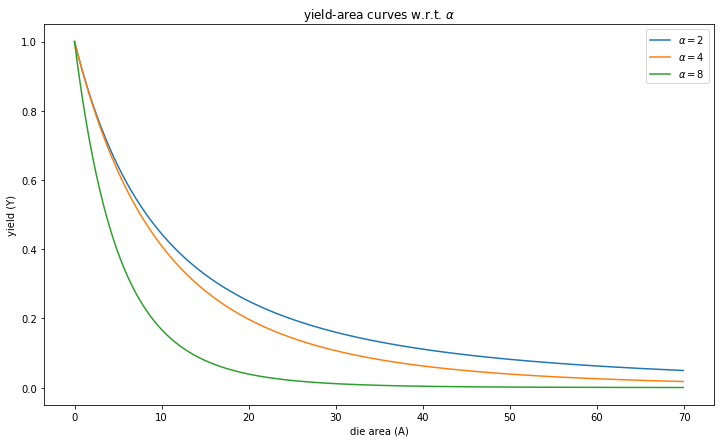

In [3]:
import matplotlib.pyplot as plt
import numpy as np

D0 = 0.1 #0.1 defects/area^2 
A = np.arange(0.0, 70, 0.1) #die area
y2 = 1/(1+((D0*A)/2))**2 #Yield w/ alpha = 2
y4 = 1/(1+((D0*A)/4))**4 #Yield w/ alpha = 4
y8 = 1/(1+((D0*A)/4))**8 #Yield w/ alpha = 8

plt.rcParams['figure.figsize'] = [12, 7]
plt.plot(A, y2, A, y4, A, y8)
plt.xlabel('die area (A)')
plt.ylabel('yield (Y)')
plt.legend([r'$\alpha = 2$',r'$\alpha = 4$',r'$\alpha = 8$'])
plt.title(r'yield-area curves w.r.t. $\alpha$')

plt.show()

# Annotated Bibliography

- The Poisson Die Yield Model is described in Robert Leachman's *Yield Modeling and Analysis* (2017). The Negative Binomial Model is also discussed, but without the explicit derivation above. 
- Yu I. Bogdanov *et al* present by far the most complete description of different yield models and their histories, including the Negative Binomial, in *Statistical Yield Modeling for IC Manufacture* (2003).